In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from pandas import read_csv
import matplotlib.pyplot as plt
layover= read_csv('/content/data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
layover.head()

,City,IATA,Unique,Corresponding city,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Current stops,Covid cases
0,Goroka,GKA,AAE,Annaba,2B,410,AER,2965,KZN,2990,0,4601199.0
1,Madang,MAG,AAL,Aalborg,2B,410,ASF,2966,MRV,2990,0,1956302.0
2,Mount Hagen,HGU,AAN,Al Ain,2B,410,CEK,2966,OVB,2962,0,2199618.0
3,Nadzab,LAE,AAQ,Anapa,2B,410,DME,2968,NBC,2990,0,741507.0
4,Port Moresby,POM,AAR,Aarhus,2B,410,EGO,2968,TGK,4078,0,1442133.0


In [3]:
layover.describe()

,Current stops,Covid cases
count,67663.000000,3.418000e+03
mean,0.000163,2.930637e+06
std,0.012749,1.511034e+06
min,0.000000,3.054880e+05
25%,0.000000,1.627158e+06
50%,0.000000,2.925901e+06
75%,0.000000,4.259239e+06
max,1.000000,5.499389e+06


In [4]:
layover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    6034 non-null   object 
 1   IATA                    6034 non-null   object 
 2   Unique                  3418 non-null   object 
 3   Corresponding city      28 non-null     object 
 4   Airline                 67663 non-null  object 
 5   Airline ID              67663 non-null  object 
 6   Source airport          3409 non-null   object 
 7   Source airport ID       67663 non-null  object 
 8   Destination airport     3418 non-null   object 
 9   Destination airport ID  67663 non-null  object 
 10  Current stops           67663 non-null  int64  
 11  Covid cases             3418 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 6.2+ MB


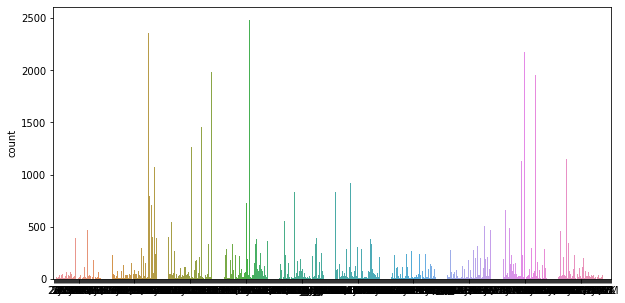

In [5]:
import seaborn as sns
labels = layover['Airline'].values
plt.figure(figsize = (10,5))
sns.countplot(x =labels)

In [6]:
from queue import PriorityQueue

In [7]:
g = nx.Graph()
nodes= [row["Source airport"] for item, row in layover.iterrows()]
edges= [(row["Source airport"], row["Destination airport"]) for item, row in layover.iterrows()]
g.add_edges_from(edges)
g.add_nodes_from(nodes)

In [8]:
[val for val in g.degree()]

[('AER', 2),
 ('KZN', 2),
 ('ASF', 1),
 ('MRV', 1),
 ('CEK', 2),
 ('OVB', 2),
 ('DME', 2),
 ('NBC', 2),
 ('EGO', 2),
 ('TGK', 2),
 ('GYD', 2),
 ('UUA', 2),
 ('KGD', 2),
 ('LED', 2),
 ('NJC', 2),
 ('NUX', 2),
 ('SVX', 2),
 ('BTK', 2),
 ('IKT', 2),
 ('HTA', 2),
 ('KCK', 2),
 ('MJZ', 2),
 ('ODO', 2),
 ('UKX', 2),
 ('ULK', 2),
 ('YKS', 2),
 ('LIM', 2),
 ('AYP', 2),
 ('PEM', 2),
 ('CUZ', 2),
 ('PCL', 2),
 ('HUU', 2),
 ('TPP', 2),
 ('IQT', 2),
 ('BOY', 2),
 ('ABJ', 2),
 ('OUA', 2),
 ('ACC', 2),
 ('BKO', 2),
 ('DKR', 2),
 ('LFW', 2),
 ('COO', 2),
 ('NIM', 2),
 ('GYE', 2),
 ('BOG', 2),
 ('UIO', 2),
 ('CLO', 2),
 ('OCC', 1),
 ('SCY', 1),
 ('ZRH', 2),
 ('BDS', 2),
 ('LPA', 2),
 ('BOD', 1),
 ('GVA', 1),
 ('BRS', 2),
 ('LCA', 2),
 ('RMF', 2),
 ('TFS', 2),
 ('LYC', 2),
 ('GEV', 2),
 ('AJR', 2),
 ('HAD', 2),
 ('ARN', 2),
 ('JKG', 2),
 ('KRF', 2),
 ('KSD', 2),
 ('HMV', 2),
 ('MHQ', 2),
 ('OER', 2),
 ('KOK', 2),
 ('POR', 2),
 ('TRF', 2),
 ('VBY', 2),
 ('VHM', 2),
 ('VXO', 2),
 ('OSL', 2),
 ('TKU', 2),

In [25]:
def find_all_paths(g, start, end, path=[]):
        path = path + [start]
        if start == end:
            return [path]
        if start not in g:
            return []
        paths = []
        for node in g[start]:
            if node not in path:
                newpaths = find_all_paths(g, node, end, path)
                for newpath in newpaths:
                    paths.append(newpath)
        return paths

In [34]:
def find_shortest_path(g, start, end, path=[]):
        path = path + [start]
        if start == end:
            return path
        if start not in g:
            return None
        shortest = None
        for node in g[start]:
            if node not in path:
                newpath = find_shortest_path(graph, node, end, path)
                if newpath:
                    if not shortest or len(newpath) < len(shortest):
                        shortest = newpath
        return shortest

In [37]:
a1=input()
a2=input()
print("All paths: ",find_all_paths(g, a1, a2),"\n")
print("\n Shortest path:",find_shortest_path(g, a1, a2,))

KZN
EGO
All paths:  [['KZN', 'AER', 'LED', 'NUX', 'UUA', 'GYD', 'SVX', 'OVB', 'CEK', 'NBC', 'DME', 'NJC', 'TGK', 'EGO'], ['KZN', 'EGO']] 


 Shortest path: ['KZN', 'EGO']
